# Workspace \#4: ``ska.py``

In [67]:
# getting future division
from __future__ import division

# autoreloading for imported modules
%load_ext autoreload
%autoreload 2

# numpy
import numpy as np
from numpy import pi, sqrt, log, log10, power, exp

#scipy
from scipy.interpolate import interp1d
from scipy.integrate import trapz

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.lines import Line2D

# other
import os
from tqdm import tqdm

# matplotlib style
%matplotlib inline
# %matplotlib notebook

%config InlineBackend.figure_format = "retina"
# rcParams['figure.figsize'] = (13, 8)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['New Times Roman']
rc('text', usetex=True)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# current directory
current_dir = os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
from random import random

import sys
sys.path.insert(0, '../')

import tools as tl
import constants as ct
import particle as pt
import ska as sk
import astro as ap

In [69]:
# The contents of astro.py
dir(sk)

['SKA_conf',
 'SKA_exper_nu',
 'SKA_get_active_baseline',
 'SKA_specs',
 'T_sys_low',
 'T_sys_mid',
 'Trec_low',
 'Trec_mid',
 'Trec_mid_MeerKAT',
 'Trec_mid_SKA',
 'Tsky_low',
 'Tsky_mid',
 '__builtins__',
 '__cached__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ct',
 'division',
 'eta_nu',
 'exp',
 'get_baseline',
 'get_telescope_coordinate',
 'initialize',
 'local_path',
 'log',
 'log10',
 'np',
 'os',
 'pi',
 'power',
 'pt',
 'sqrt',
 'tl']

In [70]:
help(sk.SKA_exper_nu)

Help on function SKA_exper_nu in module ska:

SKA_exper_nu(nu)
    Returns the SKA experiment mode (low/mid) sensitive to the given frequency nu [GHz].
    
    Parameters
    ----------
    nu : frequency [GHz]



In [71]:
print(sk.SKA_exper_nu(ct._nu_min_ska_low_*0.9))
print('%s %s' %(sk.SKA_exper_nu(ct._nu_min_ska_low_*1.1), sk.SKA_exper_nu(ct._nu_max_ska_low_*0.9)))
print('%s %s' %(sk.SKA_exper_nu(ct._nu_min_ska_mid_*1.1), sk.SKA_exper_nu(ct._nu_max_ska_mid_*0.9)))
print(sk.SKA_exper_nu(ct._nu_max_ska_mid_*1.1))

None
SKA low SKA low
SKA mid SKA mid
None


In [72]:
help(sk.SKA_specs)

Help on function SKA_specs in module ska:

SKA_specs(nu, exper_mode, correlation_mode=None, theta_sig=None)
    Returns the SKA specifications for the given experiment mode and frequency [GHz]:
    
    area [m^2],
    window,
    receiver noise brightness temperature [K],
    efficiency,
    solid angle resolution [sr],
    number_of_dishes, and
    number_of_measurements.
    
    Parameters
    ----------
    nu : frequency [GHz]
    exper_mode : mode in which the experiment is working
    correlation_mode: whether to run in interferometry mode or single dish mode. Default None is meant to raise error if not assigned explicitly.
    theta_sig: the signal size we want to observe [radian]



In [73]:
# area, window, receiver noise temp, efficiency, Omega res, num. dishes, num. mesur

print(sk.SKA_specs(ct._nu_min_ska_low_*1.1, 'SKA low', correlation_mode="single dish")) # within SKA low detection region
print(sk.SKA_specs(ct._nu_min_ska_mid_*1.1, 'SKA mid', correlation_mode="single dish")) # within SKA mid detection region
print(sk.SKA_specs(ct._nu_min_ska_mid_*1.1, 'SKA low', correlation_mode="single dish")) # outside SKA low detection region

(580667.0, 1.0, array(40.), array(0.72100819), 0.02403705596310762, 512.0, 512.0)
(32663.9, 1.0, array(18.99675), array(0.70368876), 0.003357063713178731, 197.0, 197.0)
(580667.0, 0.0, array(40.), array(0.70368876), 0.0004908588680494537, 512.0, 512.0)


In [74]:
Nma = 101
nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)

In [75]:
sk.SKA_specs(nulow, 'SKA low', correlation_mode="single dish")[3]

array([0.5057981 , 0.61667889, 0.69413682, 0.75597101, 0.80315344,
       0.84475037, 0.87869806, 0.90061022, 0.91660752, 0.92303052,
       0.92360661, 0.91966004, 0.91375089, 0.91988569, 0.91842975,
       0.90580473, 0.85406373, 0.80485619, 0.74736355, 0.68439616,
       0.62706199, 0.58152635, 0.53948539, 0.50114336, 0.46633472,
       0.44362225, 0.4235254 , 0.40014608, 0.37717723, 0.35231395,
       0.3261482 , 0.30137659, 0.27910563, 0.25753803, 0.23853723,
       0.22353319, 0.20756744, 0.19524754, 0.17838384, 0.16427126,
       0.15594749, 0.14934677, 0.14018855, 0.13123802, 0.12410101,
       0.11494072, 0.10841857, 0.10369495, 0.09227076, 0.08356197])

In [76]:
sk.SKA_specs(numid, 'SKA mid', correlation_mode="single dish")[3]

array([0.08356197, 0.70376407, 0.69058577, 0.66500397, 0.64618064,
       0.60783938, 0.62737601, 0.83738209, 0.83688063, 0.83764326,
       0.84353953, 0.8410743 , 0.827654  , 0.90959337, 0.83599994,
       0.85100383, 0.8499901 , 0.84697951, 0.84364298, 0.84175198,
       0.83955425, 0.83809667, 0.83979238, 0.84008619, 0.8395697 ,
       0.83997343, 0.83966015, 0.839155  , 0.8384045 , 0.63727202,
       0.63715748, 0.63681421, 0.6363564 , 0.63590181, 0.6319519 ,
       0.63493452, 0.63439867, 0.63374495, 0.63262102, 0.63166188,
       0.63063822, 0.62956   , 0.62725856, 0.62544284, 0.62351145,
       0.62195212, 0.61888253, 0.61651782, 0.61289234, 0.60907753,
       0.60473116])

In [77]:
sk.SKA_specs(nulow, 'SKA low', correlation_mode="single dish")[4]

array([0.02908094, 0.02686212, 0.02481248, 0.02291913, 0.02117018,
       0.01955462, 0.01806229, 0.0166838 , 0.01541047, 0.01423428,
       0.01314784, 0.01214429, 0.01121731, 0.01036108, 0.00957018,
       0.00883965, 0.00816486, 0.00754158, 0.00696587, 0.00643409,
       0.00594291, 0.00548922, 0.00507016, 0.00468309, 0.00432556,
       0.00399533, 0.00369031, 0.00340857, 0.00314834, 0.00290797,
       0.00268596, 0.00248089, 0.00229148, 0.00211653, 0.00195493,
       0.00180568, 0.00166781, 0.00154048, 0.00142286, 0.00131423,
       0.00121389, 0.00112121, 0.0010356 , 0.00095653, 0.0008835 ,
       0.00081604, 0.00075374, 0.00069619, 0.00064303, 0.00059394])

In [78]:
sk.SKA_specs(numid, 'SKA mid', correlation_mode="single dish")[4]

array([4.06197112e-03, 3.49144575e-03, 3.00104731e-03, 2.57952411e-03,
       2.21720403e-03, 1.90577287e-03, 1.63808381e-03, 1.40799354e-03,
       1.21022141e-03, 1.04022835e-03, 8.94112693e-04, 7.68520754e-04,
       6.60569833e-04, 5.67782102e-04, 4.88027742e-04, 4.19476072e-04,
       3.60553541e-04, 3.09907610e-04, 2.66375719e-04, 2.28958599e-04,
       1.96797340e-04, 1.69153674e-04, 1.45393035e-04, 1.24969988e-04,
       1.07415715e-04, 9.23272481e-05, 7.93582228e-05, 6.82109275e-05,
       5.86294686e-05, 5.03938972e-05, 4.33151598e-05, 3.72307584e-05,
       3.20010211e-05, 2.75058950e-05, 2.36421909e-05, 2.03212140e-05,
       1.74667288e-05, 1.50132078e-05, 1.29043286e-05, 1.10916799e-05,
       9.53365077e-06, 8.19447524e-06, 7.04341136e-06, 6.05403543e-06,
       5.20363541e-06, 4.47268963e-06, 3.84441853e-06, 3.30439960e-06,
       2.84023621e-06, 2.44127305e-06, 2.09835157e-06])

In [79]:
print(ct._SKA1Mid_number_of_dishes_)
print(ct._SKALow_number_of_stations_)

197.0
512.0


## SKA modes

Below are some useful numbers found in the leterature.

#### Effective area

In [80]:
# Ghosh SKA1-mid number of dishes: 
1e6/(np.pi*7.5**2)

5658.842421045168

In [81]:
# SKA1-mid effective area
64 * np.pi * (13.5/2)**2 + 133 * np.pi* (15/2)**2

32663.924217536474

In [82]:
# SKA1-mid effective area (2013 design)
64 * np.pi * (13.5/2)**2 + 190 * np.pi * (15/2)**2

42736.655663108744

In [83]:
# SKA-low effective area (latest summary v4, 38m-stations)
512 * np.pi * 38**2 / 4

580666.8533483086

In [84]:
# SKA-low effective area (2015 design, 35m-stations)
512 * np.pi * 35**2 / 4

492601.72808287956

In [85]:
# SKA-low effective area (2013 design, 35m-stations x 911 stations)
911 * np.pi * 35**2 / 4

876484.7153974674

#### angular size

In [86]:
# SKA-low
print('Caputo et al:', 3.6 / 60 / 180 * 3.14)
print('Simple estimate: ', 1. / 1000.)

print('Caputo et al:', 25.2 / 60 / 180 * 3.14)
print('Simple estimate: ', 1. / 150.)


Caputo et al: 0.0010466666666666669
Simple estimate:  0.001
Caputo et al: 0.007326666666666666
Simple estimate:  0.006666666666666667


In [87]:
# the baseline needed to resolve a SN like W28
6./(48./60/180 * 3.14)

429.9363057324841

Use the array configuration

SKA Low

In [88]:
(data_raw, x_arr, y_arr, bins_radius, hist_radius) = sk.SKA_conf['low radius']
(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['low baseline']

Text(0, 0.5, 'cumulative fraction of total telescopes')

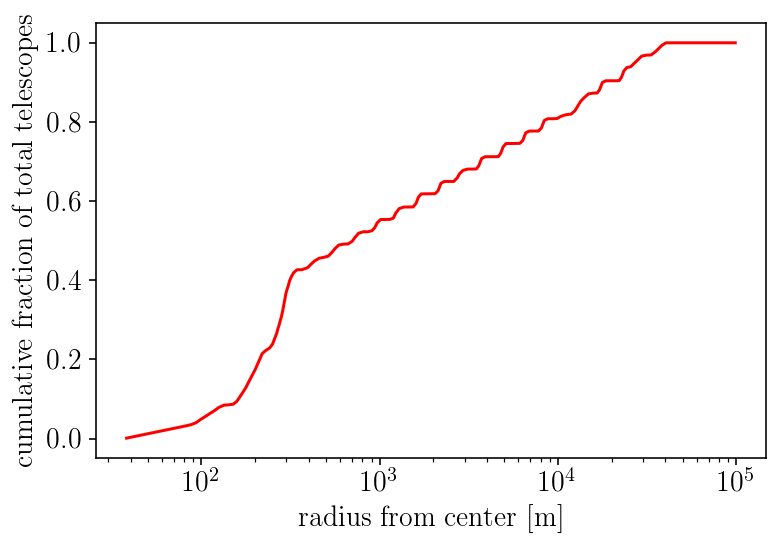

In [89]:
plt.subplots()
plt.plot(data_raw[:,0], data_raw[:,1], 'r')
#plt.plot(bins_radius, hist_radius, 'k.')

plt.xscale('log')
#plt.xlim(1e2, 1e5)
plt.xlabel('radius from center [m]')
plt.ylabel('cumulative fraction of total telescopes')

Text(0.5, 0, 'station index')

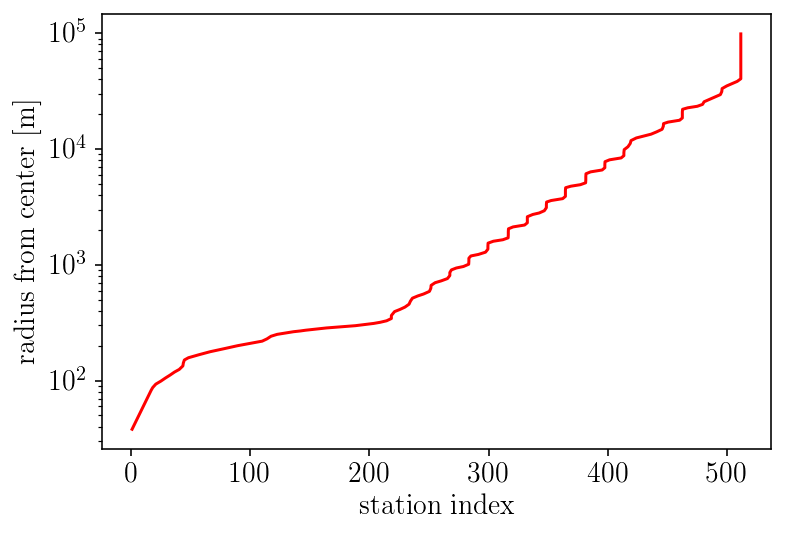

In [90]:
plt.subplots()
plt.plot(data_raw[:,1]*ct._SKALow_number_of_stations_, data_raw[:,0], 'r')
#plt.plot(hist_radius, bins_radius, 'k.')

plt.yscale('log')
#plt.ylim(1e2, 1e5)
plt.ylabel('radius from center [m]')
plt.xlabel('station index')

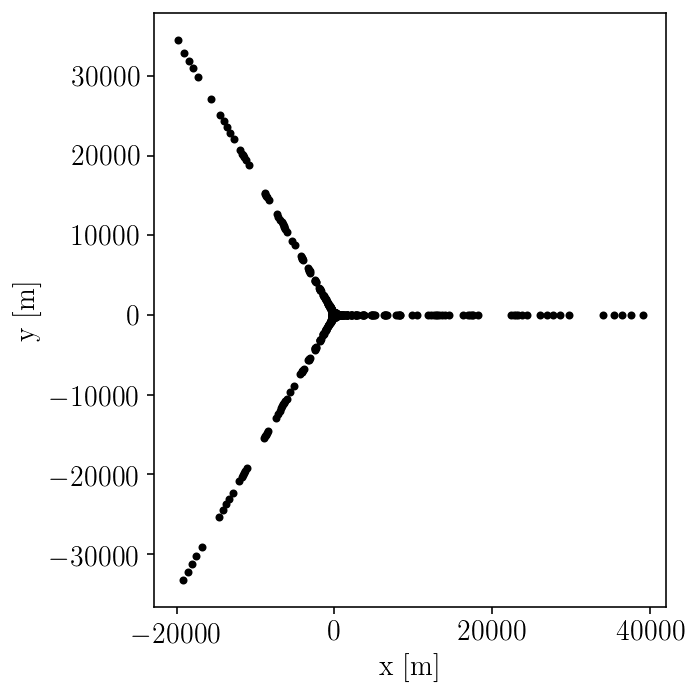

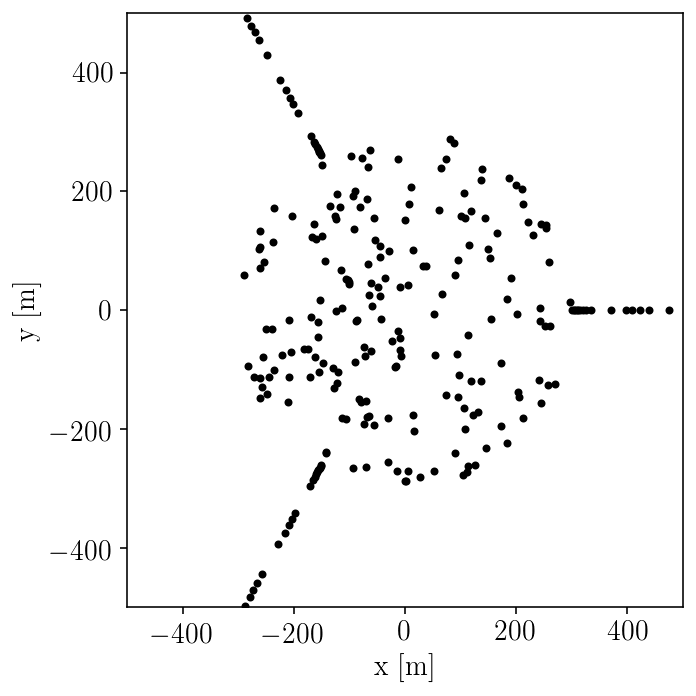

In [91]:
_, ax =  plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()
#ax.set_aspect(0.8)

plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.tight_layout()
#ax.set_aspect(1)

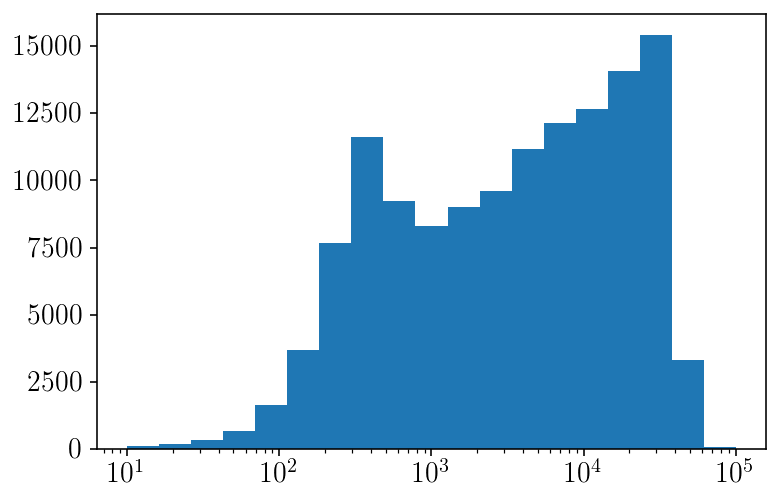

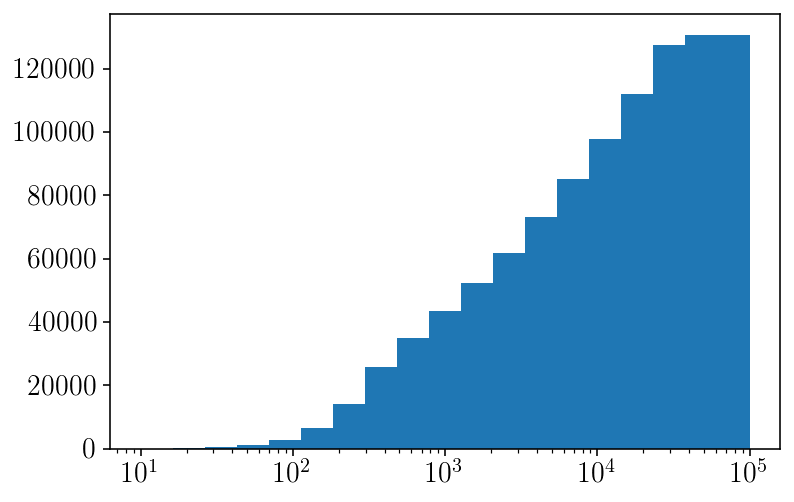

In [92]:
plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline)
plt.xscale('log')

plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline_cumsum)
plt.xscale('log')

SKA mid

In [93]:
(data_raw, x_arr, y_arr, bins_radius, hist_radius) = sk.SKA_conf['mid radius']
(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['mid baseline']

Text(0, 0.5, 'cumulative fraction of total telescopes')

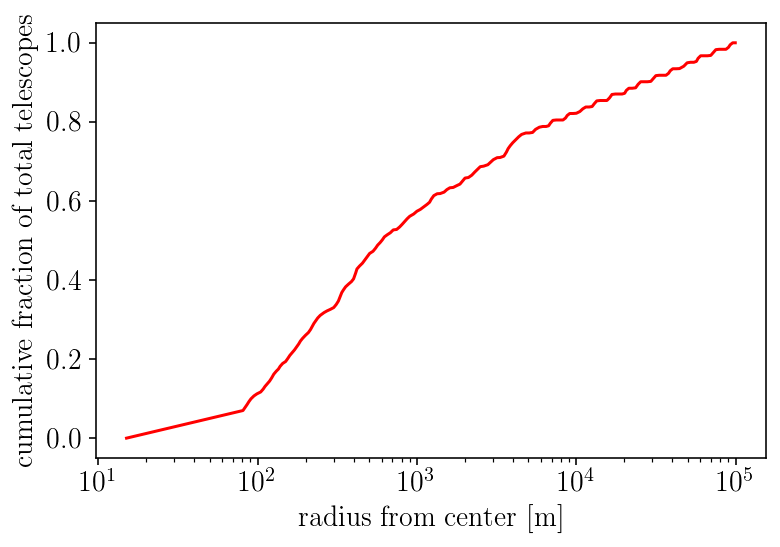

In [94]:
plt.subplots()
plt.plot(data_raw[:,0], data_raw[:,1], 'r')
#plt.plot(bins_radius, hist_radius, 'k.')

plt.xscale('log')
#plt.xlim(0.1, 1e5)
plt.xlabel('radius from center [m]')
plt.ylabel('cumulative fraction of total telescopes')

Text(0.5, 0, 'dish index')

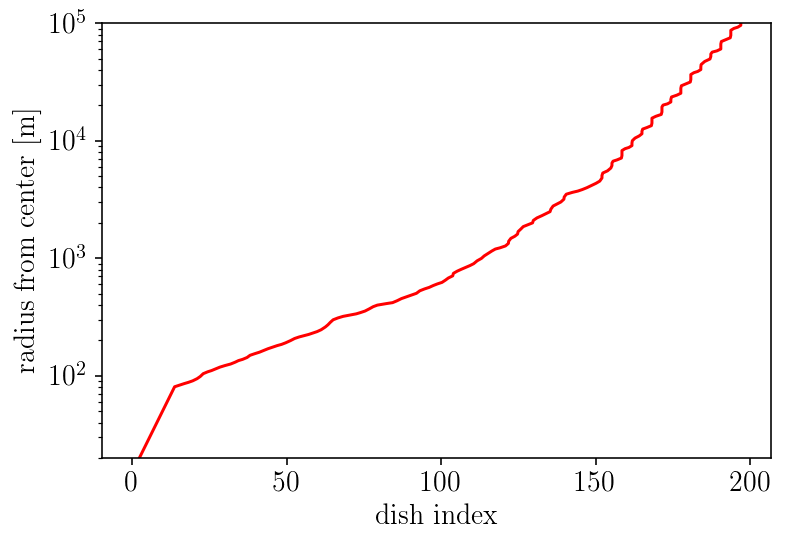

In [95]:
plt.subplots()
plt.plot(data_raw[:,1]*ct._SKA1Mid_number_of_dishes_, data_raw[:,0], 'r')
#plt.plot(hist_radius, bins_radius, 'k.')

plt.yscale('log')
plt.ylim(20, 1e5)
plt.ylabel('radius from center [m]')
plt.xlabel('dish index')

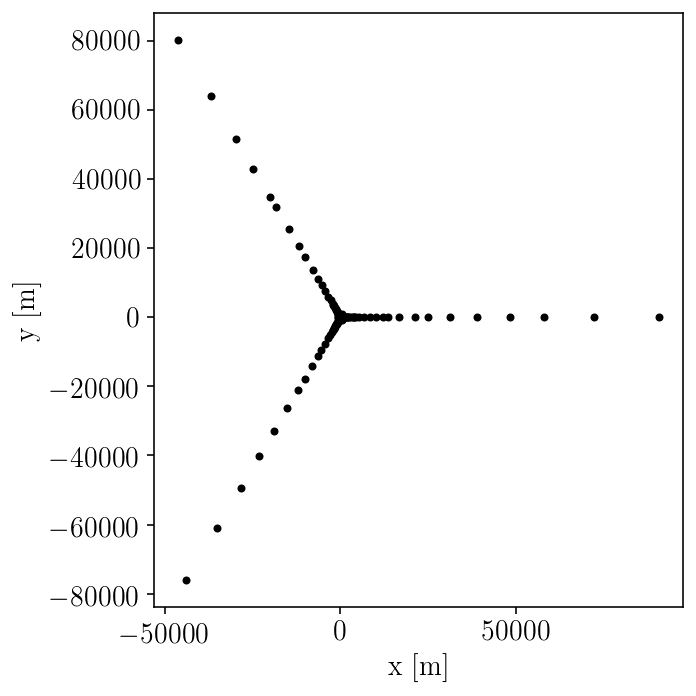

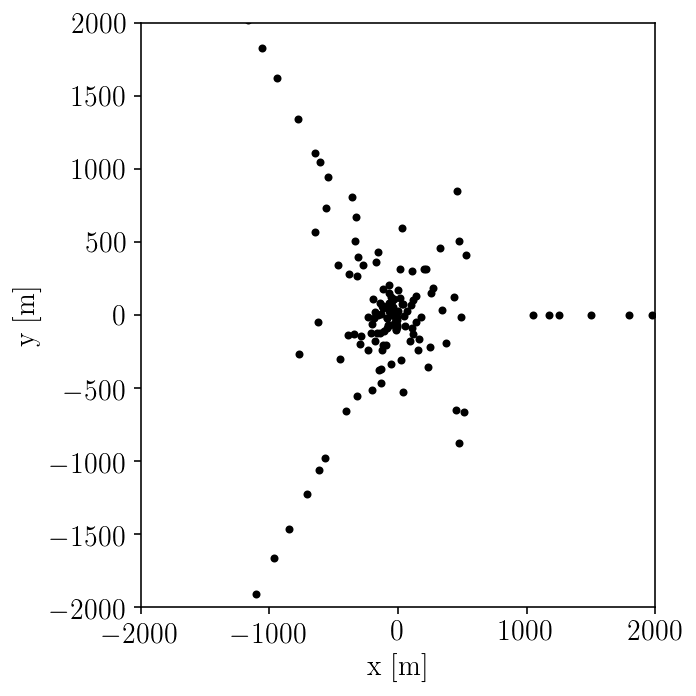

In [96]:
_, ax =  plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()
#ax.set_aspect(0.8)

plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-ct._SKA1Mid_r_core_*2, ct._SKA1Mid_r_core_*2)
plt.ylim(-ct._SKA1Mid_r_core_*2, ct._SKA1Mid_r_core_*2)
plt.tight_layout()
#ax.set_aspect(1)

Text(0.5, 0, 'B smaller than [m]')

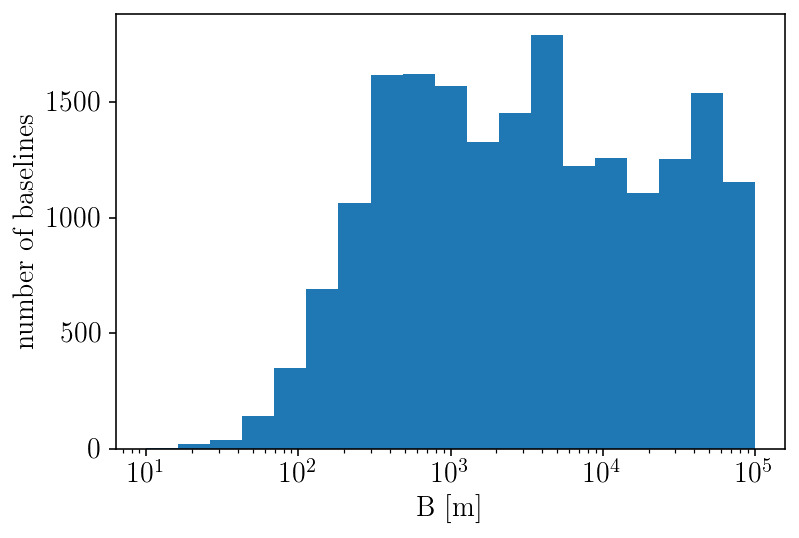

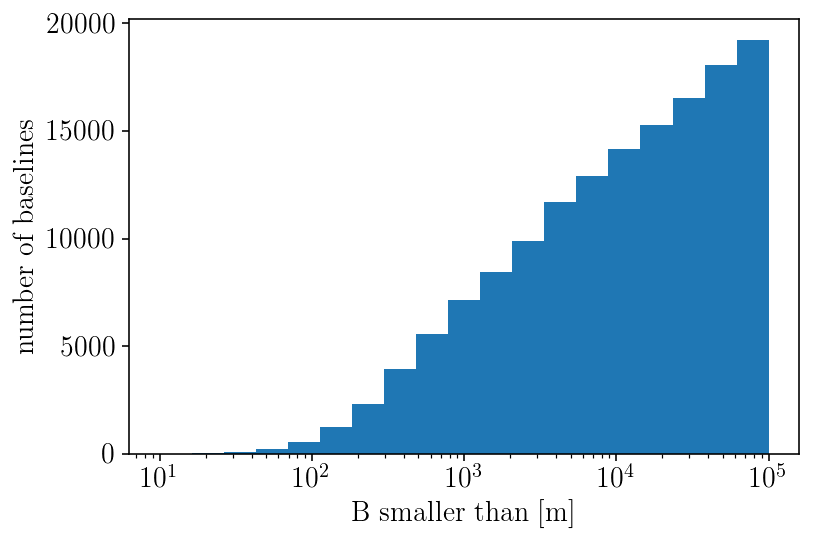

In [97]:
plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline)
plt.xscale('log')
plt.ylabel('number of baselines')
plt.xlabel('B [m]')

plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline_cumsum)
plt.xscale('log')
plt.ylabel('number of baselines')
plt.xlabel('B smaller than [m]')


Text(0.5, 0, 'B smaller than [m]')

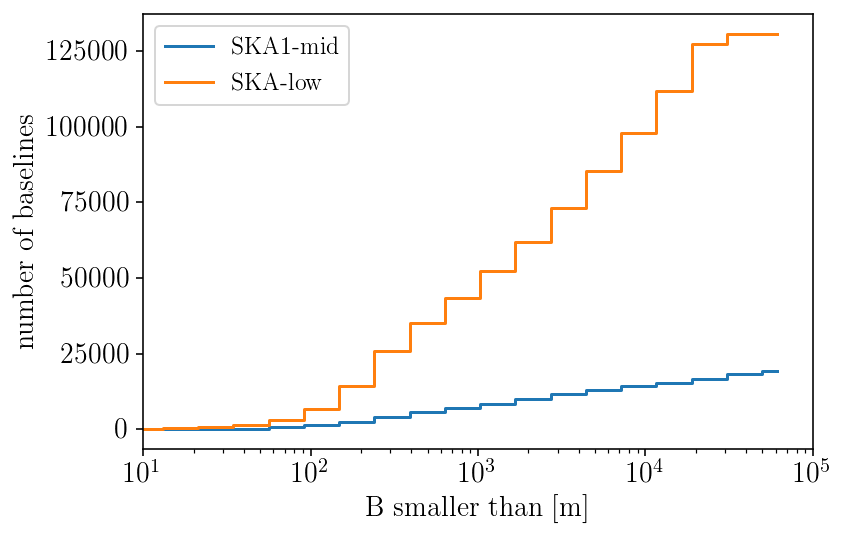

In [98]:
# binned version
plt.subplots()

(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['mid baseline']
plt.step(bins_baseline[:-1], hist_baseline_cumsum, where='mid', label='SKA1-mid')
(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['low baseline']
plt.step(bins_baseline[:-1], hist_baseline_cumsum, where='mid', label='SKA-low')

plt.xscale('log')
plt.xlim(1e1, 1e5)
plt.legend(loc='best')
plt.ylabel('number of baselines')
plt.xlabel('B smaller than [m]')
#plt.savefig('../plots/SKA_baseline_configuration.pdf')

<IPython.core.display.Javascript object>


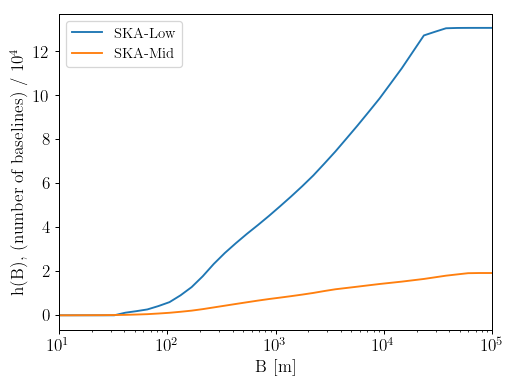

In [60]:
# unbinned version
plt.subplots()

(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['low baseline']
r = np.logspace(1, 6)
active_baseline_arr = sk.SKA_get_active_baseline(r, exper_mode='SKA low')
plt.plot(r, active_baseline_arr/1e4, label='SKA-Low')

(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['mid baseline']
r = np.logspace(1, 6)
active_baseline_arr = sk.SKA_get_active_baseline(r, exper_mode='SKA mid')
plt.plot(r, active_baseline_arr/1e4, label='SKA-Mid')

plt.xscale('log')
plt.xlim(1e1, 1e5)
plt.legend(loc=2)
plt.ylabel('h(B), (number of baselines) / $10^4$')
plt.xlabel('B [m]')
plt.tight_layout()
#plt.savefig('../plots/SKA_baseline_configuration.pdf')

In [100]:
# single point testing 
print(sk.SKA_specs(0.05, exper_mode="SKA low", correlation_mode="interferometry", theta_sig=50))
print(ct._SKALow_total_baselines_ == 512*511/2)

(580667.0, 1.0, array(40.), array(0.5057981), 0.05527436324391732, 512.0, array(1.e-100))
True


In [101]:
# test the number of baselines changing 
# as a function of frequency
for nu in np.logspace(-2, 15,200):
    (area, 
     window, 
     Tr,
     eta,
     Omega_res, 
     number_of_dishes, 
     number_of_measurements) = sk.SKA_specs(nu, 
                                            exper_mode="SKA low", 
                                            correlation_mode="interferometry", 
                                            theta_sig=45*ct._arcmin_over_radian_)
    print(number_of_measurements)

68858.94571463192
64333.293704581665
60107.97889062737
56217.3708504264
52328.81846870853
48678.83731292963
45028.856157150745
41531.67083228353
38162.48867147952
34763.599100919986
31021.91191499034
27280.224729060694
22943.75763072871
18235.505118165904
13767.190341003658
10648.37375808908
7529.557175174514
5526.502227440647
4032.830116887888
2723.604819439808
2060.1563269774947
1396.707834515184
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-

Visibility function scaling

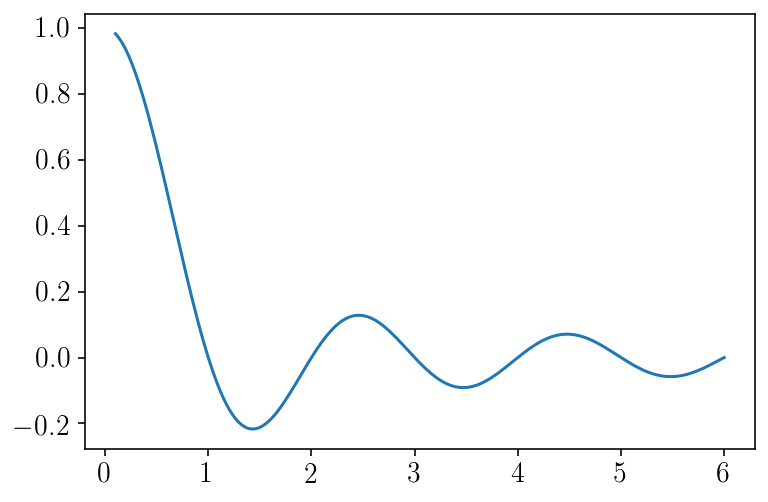

In [102]:
x_arr = np.linspace(0.1, 6, 200)
fn = lambda x: np.sin(np.pi*x)/(np.pi*x)
fn3 = lambda x: np.sin(np.pi*x)
fn2 = lambda x: fn(x) - 0.3
plt.subplots()
plt.plot(x_arr, fn(x_arr))
#plt.plot(x_arr, fn3(x_arr))

In [103]:
from scipy.optimize import root_scalar
root_scalar(fn2, bracket=[0.1,1], method="bisect")

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 0.7500785142090535

### Efficiency

In [104]:
Nsteps = 2001

nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nsteps//2)[1:]
# ... and SKA mid...
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nsteps - Nsteps//2)[1:]
# ... concatenating...
nu_arr = np.concatenate((nulow, numid))

In [105]:
help(sk.eta_nu)

Help on function eta_nu in module ska:

eta_nu(nu)
    Returns the efficiency eta.
    
    nu : frequency [GHz]



In [130]:
help(ap.T_sys)

Help on function T_sys in module astro:

T_sys(nu, Tbg_at_408=27, beta=-2.55, Tr=None)
    The system temperature [K] seen by a single unit instantaneously. This function can be used for any experiments but if Tr is not specified, it will be automatically computed based on SKA.
    
    Parameters
    ----------
    nu: frequency [GHz]
    Tbg_at_408: the MW background at 408 MHz [K] (default: 27, for Cygnus A gegenschein position)
    beta: the index for the Milky (default: -2.55)
    Tr: the receiver's noise brightness temperature (default: 0.)



In [131]:
ap.T_sys([0.2, 0.25, 0.4, 1,2,3, 100])

array([2.12036391e+02, 1.39871128e+02, 6.01971670e+01, 2.06485645e+01,
       1.83181501e+01, 1.80707970e+01, 5.81603454e+04])

### Deriving the efficiency

the Bose distribution correction to temperature

In [132]:
def corr_fn(nu, T):
    x = 2.*np.pi * nu / T * ct._GHz_over_eV_ / ct._K_over_eV_
    res = x / (np.exp(x) - 1.)
    return res
    
corr_fn(10, 20)

# the atm opacity is also a small correction

0.9880498744786951

the sky temperature

Text(0, 0.5, '$T_{\\rm sky}$ [K]')

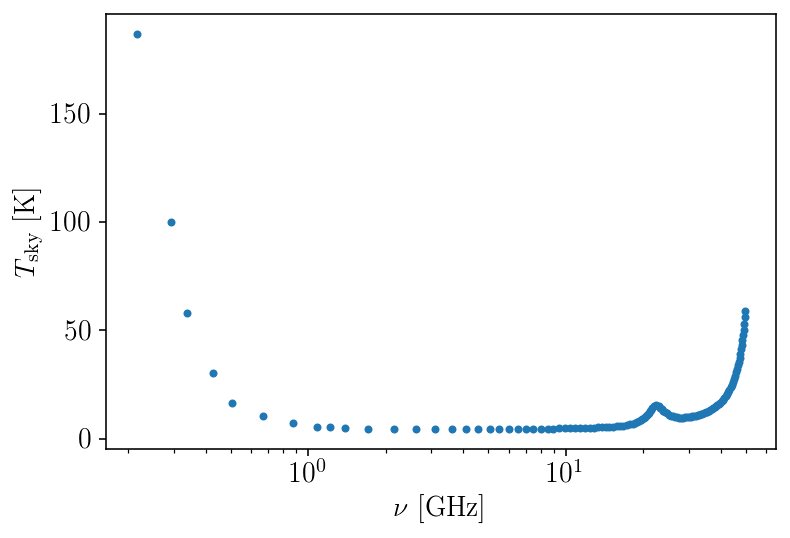

In [133]:
plt.subplots()
plt.plot(ap.Tsky_mid[:,0], ap.Tsky_mid[:,1], '.')
plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm sky}$ [K]')
#plt.ylim(0, 15)

Receiver temperature

In [134]:
nu_arr = np.concatenate((nulow, numid))

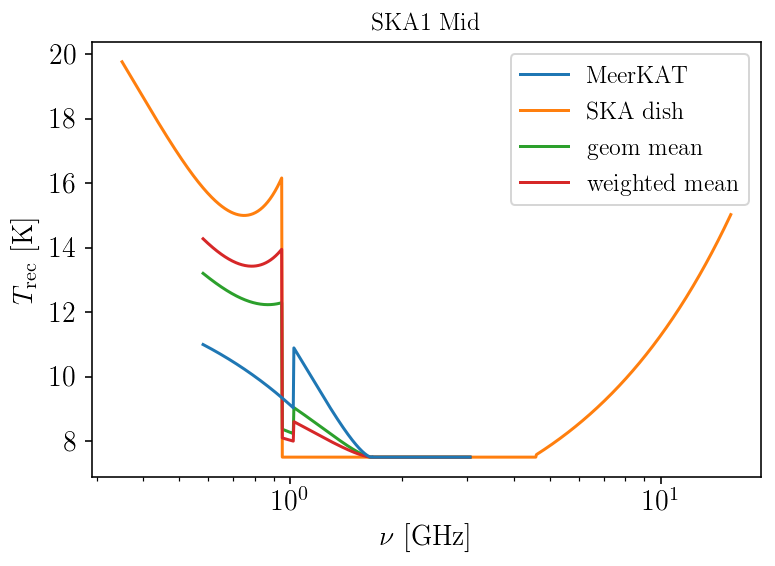

In [135]:
plt.subplots()
plt.plot(nu_arr, sk.Trec_mid_MeerKAT(nu_arr), label='MeerKAT', zorder=3)
plt.plot(nu_arr, sk.Trec_mid_SKA(nu_arr), label='SKA dish')
plt.plot(nu_arr, sqrt(sk.Trec_mid_SKA(nu_arr)*sk.Trec_mid_MeerKAT(nu_arr)), label='geom mean')
plt.plot(nu_arr, (sk.Trec_mid_SKA(nu_arr)*133 + sk.Trec_mid_MeerKAT(nu_arr)*64)/(197.), label='weighted mean')
plt.xscale('log')
plt.ylabel(r'$T_{\rm rec}$ [K]')
plt.xlabel(r'$\nu$ [GHz]')
plt.title('SKA1 Mid')
plt.legend(loc=1)

<IPython.core.display.Javascript object>


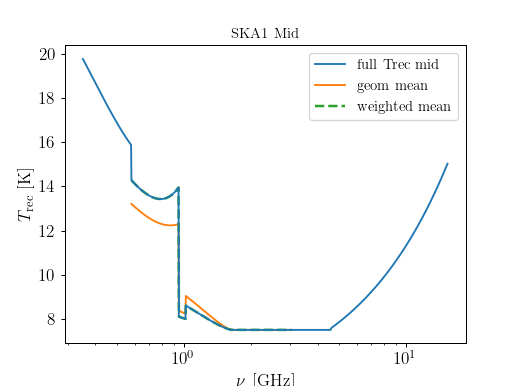

In [49]:
plt.subplots()
plt.plot(numid, sk.Trec_mid(numid), label='full Trec mid', zorder=3)
plt.plot(numid, sqrt(sk.Trec_mid_SKA(numid)*sk.Trec_mid_MeerKAT(numid)), label='geom mean')
plt.plot(numid, (sk.Trec_mid_SKA(numid)*133 + sk.Trec_mid_MeerKAT(numid)*64)/(197.), label='weighted mean', ls="--", lw=2.)
plt.xscale('log')
plt.ylabel(r'$T_{\rm rec}$ [K]')
plt.xlabel(r'$\nu$ [GHz]')
plt.title('SKA1 Mid')
plt.legend(loc=1)

In [137]:
# average value of the SKA1-mid receiver temperature
trapz(sk.Trec_mid(numid), numid)/ct._band_width_ska_mid_

10.551192577942047

<IPython.core.display.Javascript object>


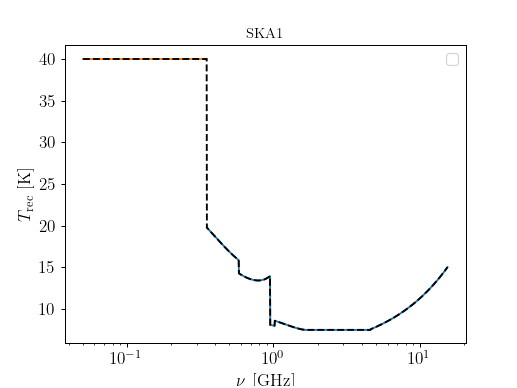

No handles with labels found to put in legend.


In [55]:
plt.subplots()
plt.plot(numid, sk.Trec_mid(numid))
plt.plot(nulow, sk.Trec_low(nulow))
plt.plot(nu_arr, sk.Trec(nu_arr), 'k--')
plt.xscale('log')
plt.ylabel(r'$T_{\rm rec}$ [K]')
plt.xlabel(r'$\nu$ [GHz]')
plt.title('SKA1')
plt.legend(loc=1)

verify with de Lera Acedo et al. 2017

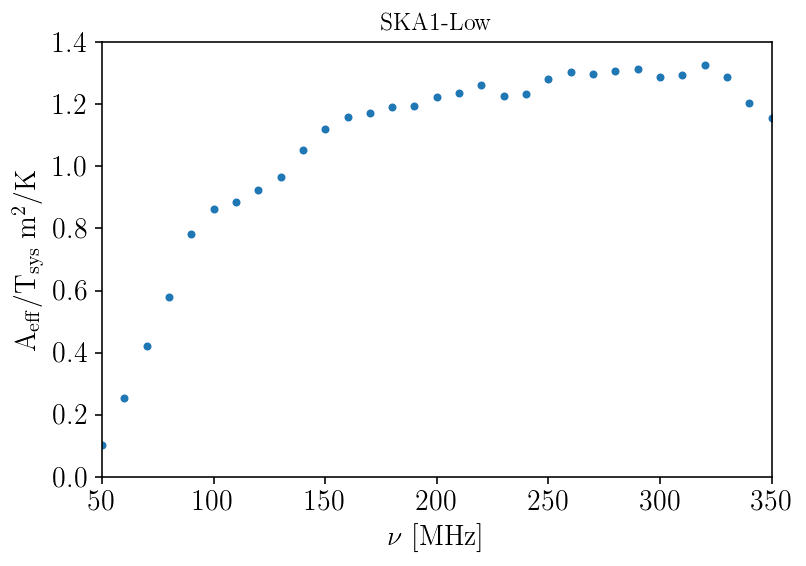

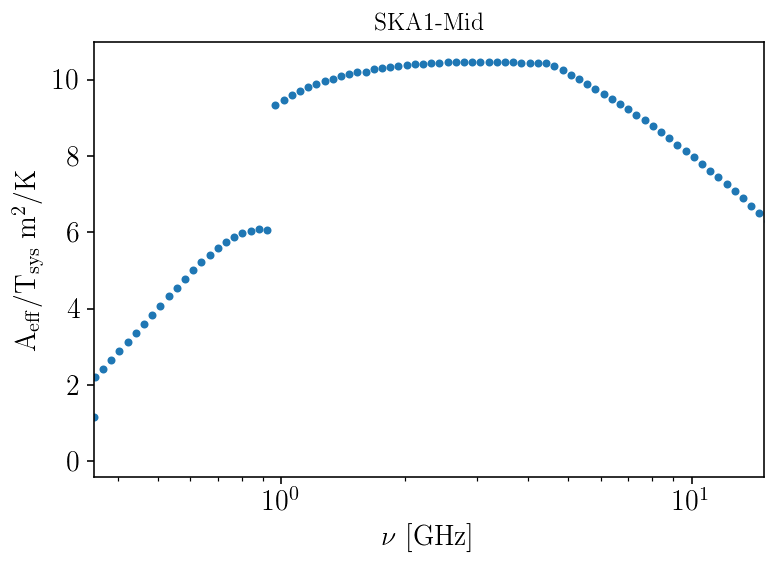

In [138]:
A_over_T = sk.SKA_conf['A/T']
x = A_over_T[:, 0]
y = A_over_T[:, 1]
plt.subplots()
plt.plot(x*1000, y, '.')
plt.xlim(50, 350)
plt.ylim(0, 1.4)
plt.xlabel(r'$\nu$ [MHz]')
plt.ylabel(r'A$_{\rm eff}$/T$_{\rm sys}$ m$^2$/K')
plt.title('SKA1-Low')

plt.subplots()
plt.plot(x, y, '.')
plt.xlim(0.35, 15)
#plt.ylim(0, 1.4)
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'A$_{\rm eff}$/T$_{\rm sys}$ m$^2$/K')
plt.title('SKA1-Mid')
plt.xscale('log')

Text(0.5, 1.0, 'SKA1-Low')

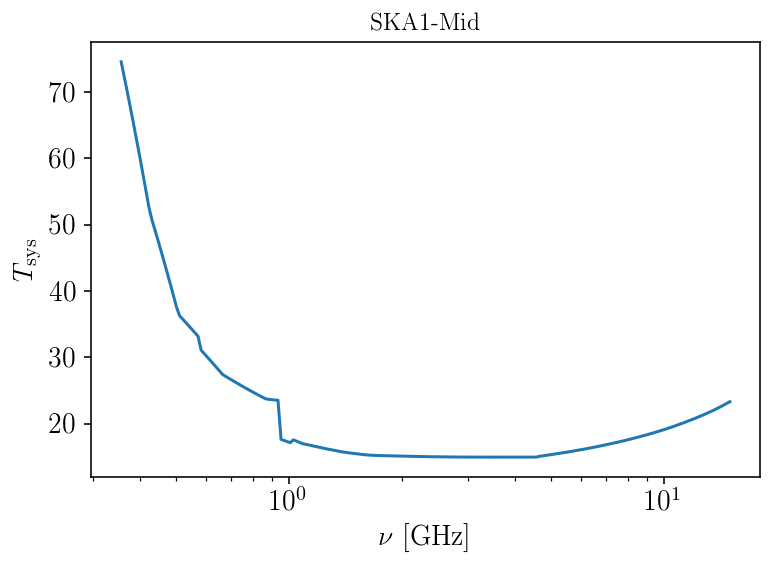

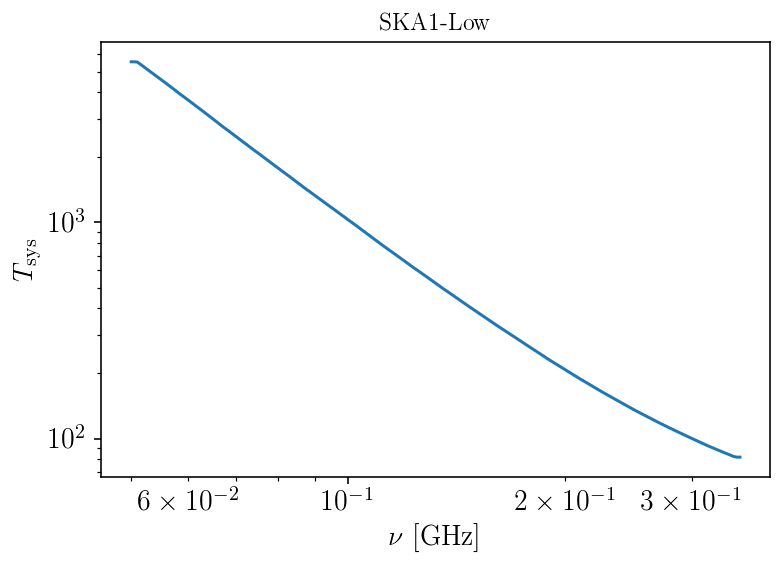

In [139]:
nu_arr = np.logspace(np.log10(0.35), np.log10(15), 200)
Tsys_mid_arr = sk.T_sys_mid(nu_arr)

plt.subplots()
plt.plot(nu_arr, Tsys_mid_arr)
plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm sys}$')
plt.title('SKA1-Mid')

nu_arr = np.logspace(np.log10(0.05), np.log10(0.35), 200)
Tsys_low_arr = sk.T_sys_low(nu_arr)
plt.subplots()
plt.plot(nu_arr, Tsys_low_arr)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm sys}$')
plt.title('SKA1-Low')

Aeff/Tsys

In [140]:
Aeff_over_Tsys = sk.SKA_conf['A/T']

Text(0.5, 1.0, 'SKA1 array')

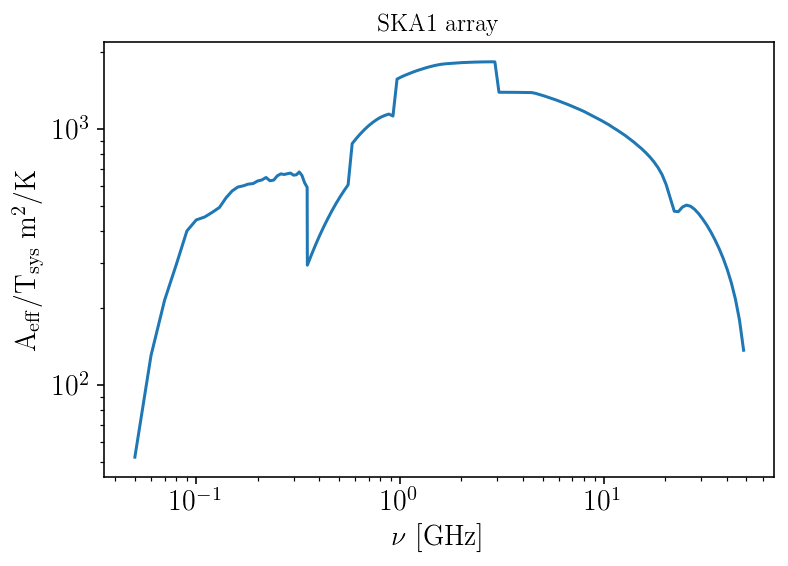

In [141]:
plt.subplots()
plt.loglog(Aeff_over_Tsys[:,0], Aeff_over_Tsys[:,2])
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'A$_{\rm eff}$/T$_{\rm sys}$ m$^2$/K')
plt.title('SKA1 array')

$\eta$ 

Text(0, 0.5, '$\\eta$')

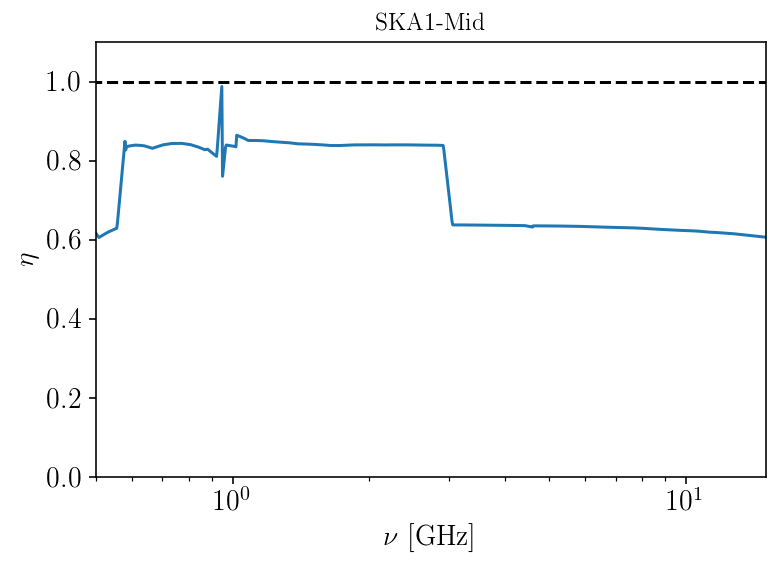

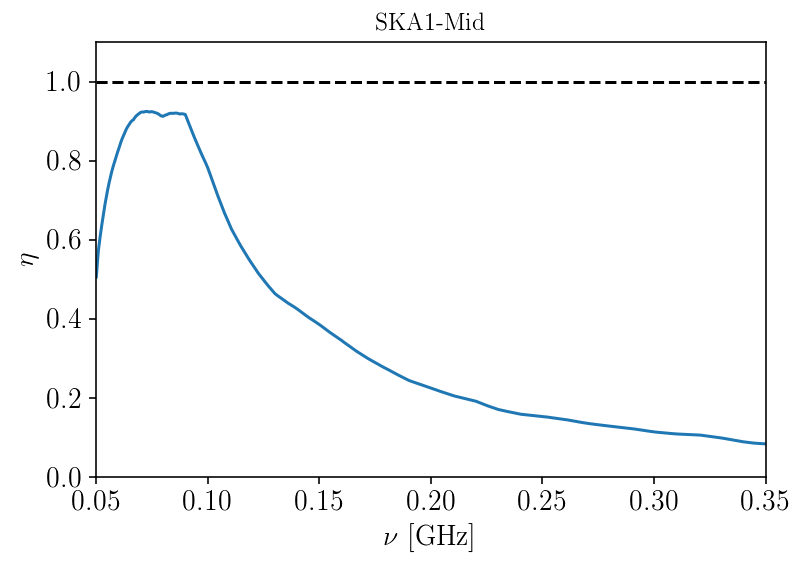

In [142]:

plt.subplots()
nu_arr, eta_mid_arr = sk.SKA_conf['eta mid']
plt.plot(nu_arr, eta_mid_arr)
plt.plot(nu_arr, [1]*len(nu_arr), 'k--')
plt.title('SKA1-Mid')
plt.xlim(0.5, 15)
plt.ylim(0, 1.1)
plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$\eta$')


plt.subplots()
nu_arr, eta_low_arr = sk.SKA_conf['eta low']
plt.plot(nu_arr, eta_low_arr)
plt.plot(nu_arr, [1]*len(nu_arr), 'k--')
plt.title('SKA1-Mid')
plt.xlim(0.05, 0.35)
plt.ylim(0, 1.1)
#plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$\eta$')

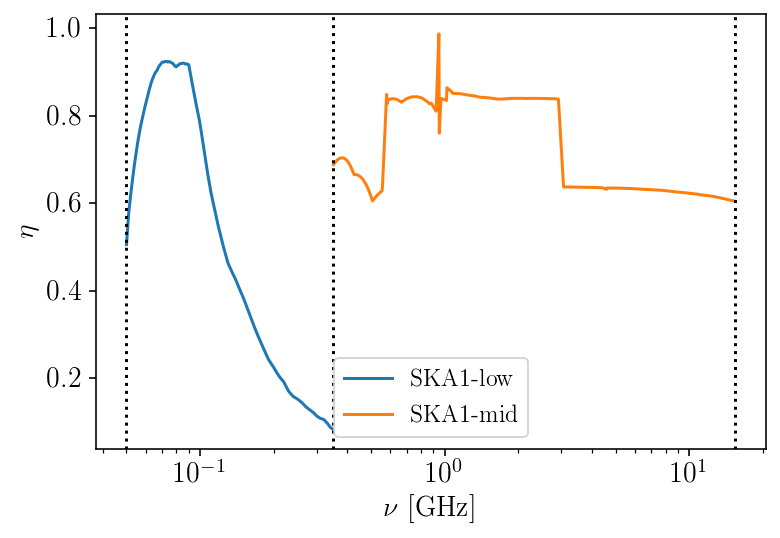

In [143]:
plt.subplots()
nu_arr, eta_arr = sk.SKA_conf['eta']
plt.plot(nu_arr[nu_arr<ct._nu_min_ska_mid_], eta_arr[nu_arr<ct._nu_min_ska_mid_], label="SKA1-low")
plt.plot(nu_arr[nu_arr>ct._nu_min_ska_mid_], eta_arr[nu_arr>ct._nu_min_ska_mid_], label="SKA1-mid")
plt.xscale("log");
plt.xlabel(r"$\nu \ [\mathrm{GHz}]$");plt.ylabel(r"$\eta$")
plt.axvline(ct._nu_min_ska_low_, ls=":", color="k")
plt.axvline(ct._nu_min_ska_mid_, ls=":", color="k")
plt.axvline(ct._nu_max_ska_mid_, ls=":", color="k")
plt.legend();
plt.savefig("./plots/eta_nu.pdf")

### Atm temperature

In [144]:
# as JiJi proposed, using Braun to extract their T_atm

In [35]:
np.interp(20, ap.Tsky_mid[:,0], ap.Tsky_mid[:,1])

9.237790117395889

<IPython.core.display.Javascript object>


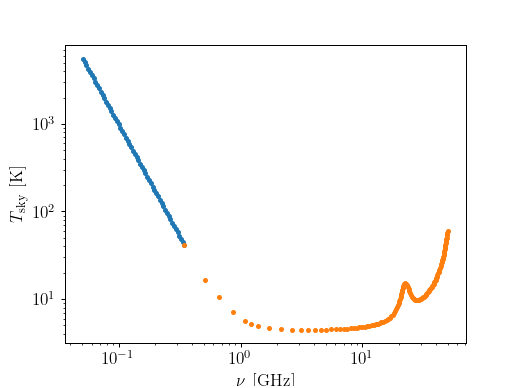

Text(0, 0.5, '$T_{\\rm sky}$ [K]')

In [37]:
Tsky_mid = sk.Tsky_mid
Tsky_low = sk.Tsky_low

plt.subplots()
#plt.plot(nu_arr, ap.Tatm_mid_fn(nu_arr))
#plt.plot(nu_arr, ap.T_atm(nu_arr))
plt.plot(Tsky_low[:,0], Tsky_low[:,1], '.')
plt.plot(Tsky_mid[:,0], Tsky_mid[:,1], '.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm sky}$ [K]')

<IPython.core.display.Javascript object>


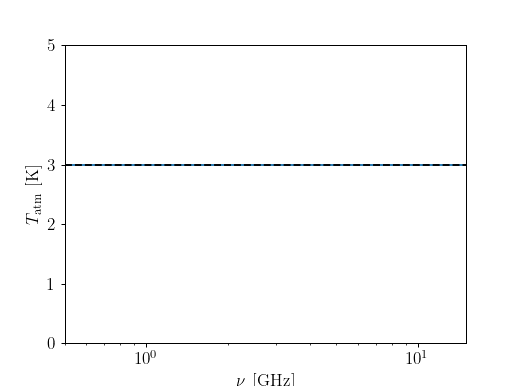

Text(0, 0.5, '$T_{\\rm atm}$ [K]')

In [57]:
plt.subplots()
#plt.plot(nu_arr, ap.Tatm_mid_fn(nu_arr))
plt.plot(nu_arr, ap.T_atm(nu_arr))
plt.plot(nu_arr, [3.]*len(nu_arr), 'k--')
plt.xscale('log')
plt.ylim(0, 5)
plt.xlim(0.5, 15)
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm atm}$ [K]')

In [148]:
# mean atmospheric temperature in SKA1-mid range
trapz(ap.T_atm(numid), numid)/ct._band_width_ska_mid_

2.1435404679319827

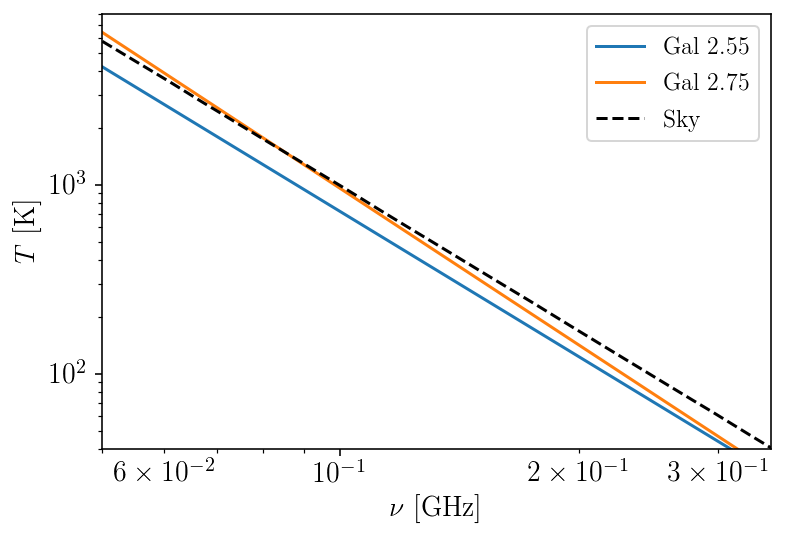

In [149]:
fn = tl.interp_fn(ap.Tsky_low)

# fn(nu_arr) - 20. * (0.408/nu_arr)**2.75

def Tgal_low_1(nu):
    return 20. * (0.408/nu)**2.55

def Tgal_low_2(nu):
    return 20. * (0.408/nu)**2.75

plt.subplots()
plt.plot(nu_arr, Tgal_low_1(nu_arr), label='Gal 2.55')
plt.plot(nu_arr, Tgal_low_2(nu_arr), label='Gal 2.75')
plt.plot(nu_arr, fn(nu_arr), 'k--', label='Sky')
plt.xscale('log')
plt.yscale('log')
plt.ylim(40, 8000)
plt.xlim(0.05, 0.35)
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T$ [K]')
plt.legend()

Text(0, 0.5, '$T_{\\rm atm}$ [K]')

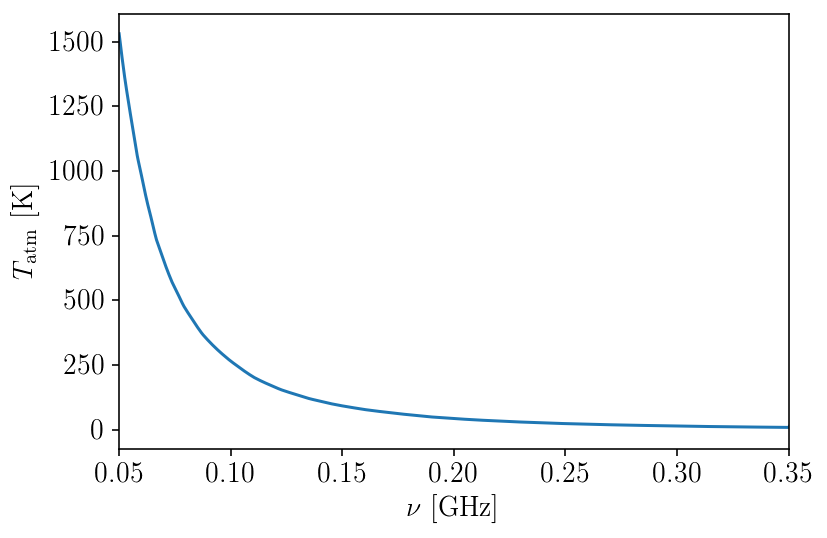

In [150]:
plt.subplots()
plt.plot(nu_arr, ap.T_atm(nu_arr))
#plt.xscale('log')
#plt.ylim(0, 5)
plt.xlim(0.05, 0.35)
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm atm}$ [K]')

<IPython.core.display.Javascript object>


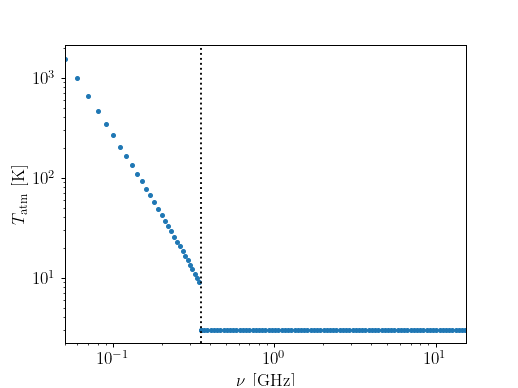

In [58]:
full_nu_arr = sk.SKA_conf['A/T'][:,0]
plt.subplots()
plt.plot(full_nu_arr, ap.T_atm(full_nu_arr), '.')
#plt.xscale('log')
#plt.ylim(0, 5)
plt.xlim(0.05, 15.4)
plt.axvline(ct._nu_min_ska_mid_, ls=":", color="k")
plt.xscale("log");plt.yscale("log");
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm atm}$ [K]');

<IPython.core.display.Javascript object>


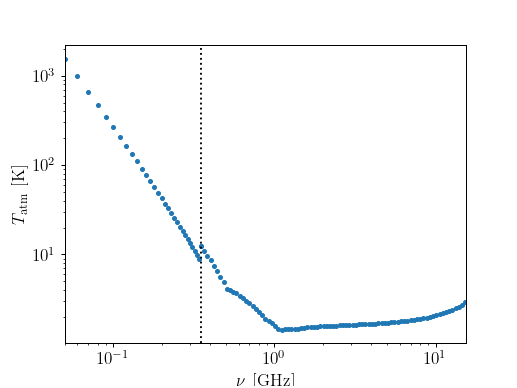

In [41]:
# 

In [42]:
ap.T_atm(ct._nu_max_ska_low_)

array(8.1132226)

In [44]:
ap.T_sys([0.35, 1,2,3,5])

array([90.75717235, 18.12161022, 15.26815011, 15.02079696, 15.3497015 ])

In [47]:
sk.Trec([0.4, 1,3,4,5])

array([18.675     ,  8.02304569,  7.5       ,  7.5       ,  7.85      ])

In [56]:
sk.Trec(5)

array(7)